![Computational Modelling for Predict Repeat General Anaesthesia in Paediatric Dentistry Patients](Images/Main.jpg)

<p style="font-size:30px;text-align:center;color:rgba(78,6,176,255)">Computational Modelling for Predict Repeat General Anaesthesia </p>
<p style="font-size:30px;text-align:center;color:rgba(78,6,176,255)">in Paediatric Dentistry Patients </p>

<p style="font-size:15px;text-align:center;color:rgba(78,6,176,255)">Spring 2023</p>

<h1>1-Objective:</h1>

The objective of this research project is to develop a predictive model using machine learning techniques to identify factors associated with repeat general anaesthesia (GA) in paediatric dentistry patients. The model will provide valuable insights into the risk factors and contribute to optimizing treatment planning and patient management strategies in dental practices.

⬇Libraries

In [73]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns

📌 My Functions & Classes

Notebook Color Scheme:


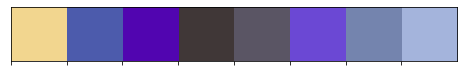

In [7]:
class clr:
    S = '\033[1m' + '\033[90m'
    E = '\033[0m'
my_colors = ["#f2d68f", "#4c5bac", "#5105b0", "#403737", "#5a5564" ,"#6b48d4","#7484ae","#a4b4dc"]
sns.palplot(sns.color_palette(my_colors))
print(clr.S+"Notebook Color Scheme:"+clr.E)
plt.show()

<h1>1-The Data & EDA</h1>

📝 we have two datasets.One for patients who had only once GA. Another one for others that more than once GA.<br>
let's have look to all of them.

In [8]:
#Read Data in DataFrame
df1=pd.read_csv("Data\Dental GA research - Copy.csv")
df2=pd.read_csv("Data\Repeat.csv")

📝 df1 consists of data for patients who had only once GA 

In [9]:
df1.head(5)

,ID,"medical History (Yes=1, No=0)",age,"regular attender (Yes=1, No=0)","Socioeconomic status(Low=1, Moderate=2, High=3)","Ease of Access (Yes=1, No=0)","PRETREATMENT RADIOGRAPHS(Yes=1, No=0)","Justification for GA(Yes=1, No=0)","Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)","REPEAT GA(Yes=1, No=0)"
0,1,1.0,8.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0
1,2,0.0,6.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0
2,3,0.0,7.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0
3,4,0.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
4,5,0.0,7.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0


In [10]:
print(clr.S+"The dataset has a size of:"+clr.E, df1.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
df1.isna().sum()

The dataset has a size of: (330, 10) 

Missing values:


ID                                                                            0
medical History (Yes=1, No=0)                                                23
age                                                                          23
regular attender (Yes=1, No=0)                                               23
Socioeconomic status(Low=1, Moderate=2, High=3)                              23
Ease of Access (Yes=1, No=0)                                                 23
PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                                        23
Justification for GA(Yes=1, No=0)                                            23
Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)    23
REPEAT GA(Yes=1, No=0)                                                       23
dtype: int64

📝 It seems that we have 23 records that all of them are Nan. so let's drop them.

In [14]:
df1.dropna(inplace=True)

print(clr.S+"The dataset has a size of:"+clr.E, df1.shape, "\n")
print(clr.S+"Missing values:"+clr.E)
df1.isna().sum()

The dataset has a size of: (307, 10) 

Missing values:


ID                                                                           0
medical History (Yes=1, No=0)                                                0
age                                                                          0
regular attender (Yes=1, No=0)                                               0
Socioeconomic status(Low=1, Moderate=2, High=3)                              0
Ease of Access (Yes=1, No=0)                                                 0
PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                                        0
Justification for GA(Yes=1, No=0)                                            0
Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)    0
REPEAT GA(Yes=1, No=0)                                                       0
dtype: int64

<div class="alert simple-alert">
  <p>💡<b>Note</b>: Great News!!!Now, It seems that don't have missing values 🎉</p
</div>

📝 df2 consists of data for patients who had Repeated GA 

In [15]:
df2.head(5)

,ID,"medical History (Yes=1, No=0)",age,"regular attender (Yes=1, No=0)","Socioeconomic status(Low=1, Moderate=2, High=3)","Ease of Access (Yes=1, No=0)","PRETREATMENT RADIOGRAPHS(Yes=1, No=0)","Justification for GA(Yes=1, No=0)","Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)","REPEAT GA(Yes=1, No=0)"
0,1,0,6,0,3,1,0,1,0,2
1,2,0,5,0,3,1,1,1,0,2
2,3,0,5,0,3,1,0,1,0,2
3,4,0,4,0,2,0,1,1,0,2
4,5,0,6,0,3,1,1,1,0,2


In [17]:
print(clr.S+"The dataset has a size of:"+clr.E, df2.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
df2.isna().sum()

The dataset has a size of: (62, 10) 

Missing values:


ID                                                                           0
medical History (Yes=1, No=0)                                                0
age                                                                          0
regular attender (Yes=1, No=0)                                               0
Socioeconomic status(Low=1, Moderate=2, High=3)                              0
Ease of Access (Yes=1, No=0)                                                 0
PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                                        0
Justification for GA(Yes=1, No=0)                                            0
Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)    0
REPEAT GA(Yes=1, No=0)                                                       0
dtype: int64

📝 Because of similarity in structure of both datasets. we append them together.

In [27]:
combined_df=df1.append(df2)

print(clr.S+"The combined dataset has a size of:"+clr.E, combined_df.shape, "\n")

The combined dataset has a size of: (369, 10) 



👌 let's see each field and take a note about each one

<h2>1-1 ID</h2>

![ID](Images/ID.jpg)

📌Unique identifier for each patient

In [41]:
print(clr.S+" The ID field has  has :"+clr.E, combined_df.iloc[:,0].nunique(), clr.S+"unique values "+clr.E+"\n")


 The ID field has  has : 369 unique values 



📝 As we know that we have 369 distinct records, it seems that during appending datasets we had experienced some kind of overlapping in ID.<br> Let's fix this.

In [39]:
combined_df.drop("ID",axis=1,inplace=True)

combined_df["ID"]=np.arange(1,370)

cols = combined_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
combined_df = combined_df.loc[:, cols]

print(clr.S+"The ID field has "+clr.E, combined_df.iloc[:,0].nunique(), clr.S+"unique values "+clr.E+"\n")

The ID field has  369 unique values 



<h2>1-2 Medical History: </h2>

![Medical History](Images/MedicalHistory.jpg)

Binary variable indicating whether the patient has a medical history (Yes=1, No=0)

In [65]:
#some changes in type
combined_df.iloc[:,1]=combined_df.iloc[:,1].astype("int")

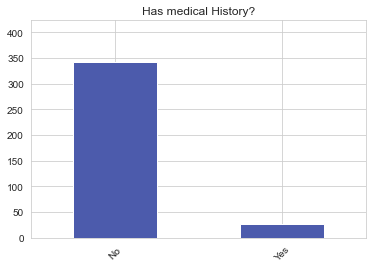

In [91]:
fig,ax=plt.subplots()
temp_df=combined_df.iloc[:,1].value_counts()
bars=temp_df.plot(kind="bar",color=my_colors[1])
ax.set_title("Has medical History?")
ax.set_xticklabels(["No","Yes"],rotation=45)
ax.set_ylim(0,max(temp_df)+80)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<h2>1-3 Age: </h2>

![Age](Images/Age.jpg)

Age of the patient

In [103]:
#some changes in type
combined_df.iloc[:,2]=combined_df.iloc[:,2].astype("int")

<Figure size 864x288 with 0 Axes>

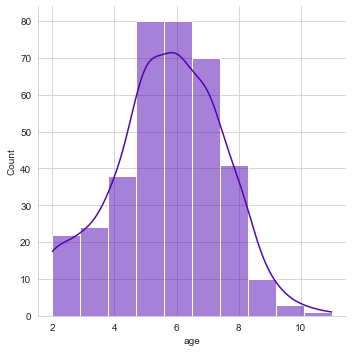

In [104]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,4))
sns.displot(data= combined_df.iloc[:,2], bins = 10,  kde=True, color = my_colors[2])
plt.show()

📝 It has almost normal shape. No scaling is needed.

<h2>1-4 Regular Attender: </h2>

Binary variable indicating whether the patient is a regular attender (Yes=1, No=0)

In [105]:
#some changes in type
combined_df.iloc[:,3]=combined_df.iloc[:,3].astype("int")

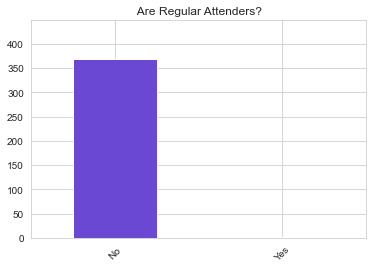

In [111]:
fig,ax=plt.subplots()
temp_df=combined_df.iloc[:,3].value_counts()
bars=temp_df.plot(kind="bar",color=my_colors[5])
ax.set_title(" Are Regular Attenders?")
ax.set_xticklabels(["No","Yes"],rotation=45)
ax.set_ylim(0,max(temp_df)+80)

plt.show()

📝 Because all records have same value so there is no information gain on this. This will be removed at next step.

<h2>1-5 Socioeconomic Status: </h2>

Categorical variable indicating socioeconomic status (Low=1, Moderate=2, High=3)

In [110]:
#some changes in type
combined_df.iloc[:,4]=combined_df.iloc[:,4].astype("int")

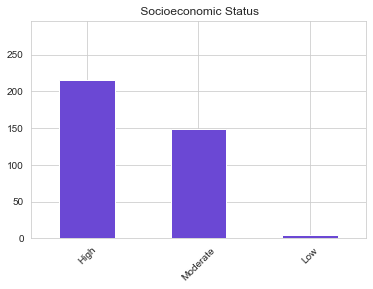

In [113]:
fig,ax=plt.subplots()
temp_df=combined_df.iloc[:,4].value_counts()
bars=temp_df.plot(kind="bar",color=my_colors[5])
ax.set_title(" Socioeconomic Status")
ax.set_xticklabels(["High","Moderate","Low"],rotation=45)
ax.set_ylim(0,max(temp_df)+80)

plt.show()

📝 Wealthy people spend more on their children dental issues. It makes sense. we will use one hot encoding on next step on this.

 <h2>1-6 Ease of Access:  </h2>

![Dental Care](Images/Dentalcare.jpg)

Binary variable indicating ease of access to dental care (Yes=1, No=0)

In [115]:
#some changes in type
combined_df.iloc[:,5]=combined_df.iloc[:,5].astype("int")

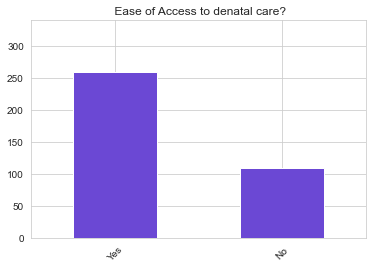

In [123]:
fig,ax=plt.subplots()
temp_df=combined_df.iloc[:,5].value_counts()
bars=temp_df.plot(kind="bar",color=my_colors[5])
ax.set_title(" Ease of Access to denatal care?")
ax.set_xticklabels(["Yes","No"],rotation=45)
ax.set_ylim(0,max(temp_df)+80)

plt.show()

📝 Most of people who did GA, had good dental care.

 <h2>1-7 Pre-treatment Radiographs: </h2>

![Xray](Images/XRay.jpg)

 Binary variable indicating whether pre-treatment radiographs are available (Yes=1, No=0)

In [122]:
#some changes in type
combined_df.iloc[:,6]=combined_df.iloc[:,6].astype("int")

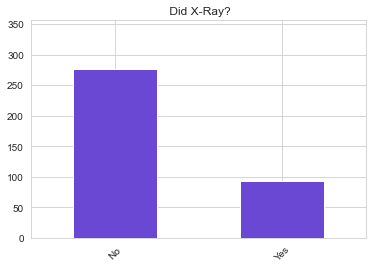

In [125]:
fig,ax=plt.subplots()
temp_df=combined_df.iloc[:,6].value_counts()
bars=temp_df.plot(kind="bar",color=my_colors[5])
ax.set_title(" Did X-Ray?")
ax.set_xticklabels(["No","Yes"],rotation=45)
ax.set_ylim(0,max(temp_df)+80)

plt.show()

📝 Most of time there is no need for X-Ray before GA.

 <h2>1-8 Justification for GA:  </h2>

Binary variable indicating whether there is a justification for GA (Yes=1, No=0)

In [128]:
#some changes in type
combined_df.iloc[:,7]=combined_df.iloc[:,7].astype("int")

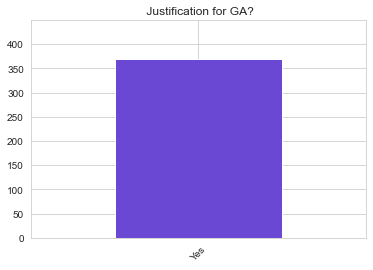

In [132]:
fig,ax=plt.subplots()
temp_df=combined_df.iloc[:,7].value_counts()
bars=temp_df.plot(kind="bar",color=my_colors[5])
ax.set_title(" Justification for GA?")
ax.set_xticklabels(["Yes","No"],rotation=45)
ax.set_ylim(0,max(temp_df)+80)

plt.show()

📝 Because all records have same value so there is no information gain on this. This will be removed at next step.

 <h2>1-9 Type of GA:   </h2>

Categorical variable indicating the type of GA procedure (RESTORATIVE=0, Composite=1, Crowns=2, Extraction only=3)

In [135]:
#some changes in type
combined_df.iloc[:,8]=combined_df.iloc[:,8].astype("int")

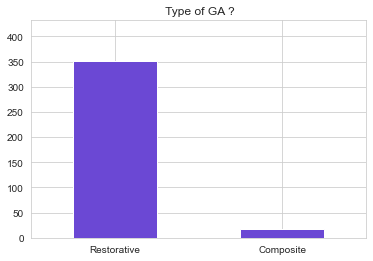

In [143]:
fig,ax=plt.subplots()
temp_df=combined_df.iloc[:,8].value_counts()
bars=temp_df.plot(kind="bar",color=my_colors[5])
ax.set_title(" Type of GA ?")
ax.set_xticklabels(["Restorative","Composite"],rotation=0)
ax.set_ylim(0,max(temp_df)+80)

plt.show()

📝 From the chart, we can see clearly most of the time GA is for Restorative. we will use one hot encoding on next step on this.

 <h2>1-10 Repeat GA:(Target Variable)   </h2>

 Binary variable indicating whether the patient requires repeat GA (Yes=1, No=0)    ????

In [145]:
#some changes in type
combined_df.iloc[:,9]=combined_df.iloc[:,9].astype("int")

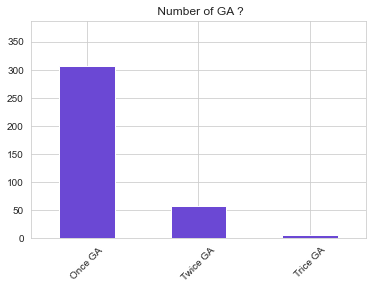

In [150]:
fig,ax=plt.subplots()
temp_df=combined_df.iloc[:,9].value_counts()
bars=temp_df.plot(kind="bar",color=my_colors[5])
ax.set_title(" Number of GA ?")
ax.set_xticklabels(["Once GA","Twice GA","Trice GA"],rotation=45)
ax.set_ylim(0,max(temp_df)+80)

plt.show()

📝 @@@